In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
valentino = pd.read_csv('data/valentino.csv')
mantero = pd.read_csv('data/mantero.csv')
ventus_village = pd.read_csv('data/ventus_village.csv')
howling_gale = pd.read_csv('data/howling_gale.csv')
salmon_valley = pd.read_csv('data/salmon_valley.csv')

In [ ]:
valentino.head()

,Timestamp,Year,Month,Day,Hour Ending,Maximum energy deliverable before curtailment (MWh),Energy actually delivered (MWh),Curtailment (MWh),Price ($/MWh) at the nodal level in the Real Time market,Name
0,2023-01-01 01:00:00,2023,1,1,1,2.0,0.0,2,26.25,Valentino
1,2023-01-01 02:00:00,2023,1,1,2,2.0,0.0,2,22.76,Valentino
2,2023-01-01 03:00:00,2023,1,1,3,2.0,0.0,2,21.94,Valentino
3,2023-01-01 04:00:00,2023,1,1,4,2.0,0.0,2,24.14,Valentino
4,2023-01-01 05:00:00,2023,1,1,5,2.0,0.0,2,23.14,Valentino


In [6]:
valentino['Name'] = 'Valentino'
mantero['Name'] = 'Mantero'
ventus_village['Name'] = 'Ventus Village'
howling_gale['Name'] = 'Howling Gale'
salmon_valley['Name'] = 'Salmon Valley'

In [10]:
valentino.dtypes

Timestamp                                                    object
Year                                                          int64
Month                                                         int64
Day                                                           int64
Hour Ending                                                   int64
Maximum energy deliverable before curtailment (MWh)         float64
Energy actually delivered (MWh)                             float64
Curtailment (MWh)                                             int64
Price ($/MWh) at the nodal level in the Real Time market    float64
Name                                                         object
dtype: object

In [13]:
valentino['Timestamp'] = pd.to_datetime(valentino['Timestamp'])
mantero['Timestamp'] = pd.to_datetime(mantero['Timestamp'])
ventus_village['Timestamp'] = pd.to_datetime(ventus_village['Timestamp'])
howling_gale['Timestamp'] = pd.to_datetime(howling_gale['Timestamp'])
salmon_valley['Timestamp'] = pd.to_datetime(salmon_valley['Timestamp'])

In [45]:
col_map = {'Maximum energy deliverable before curtailment (MWh)':'max_energy_mwh', 
            'Energy actually delivered (MWh)': 'delivered_energy_mwh',
            'Curtailment (MWh)': 'curtailment_mwh',
            'Price ($/MWh) at the nodal level in the Real Time market': 'price_$/mwh'}
    
valentino = valentino.rename(columns=col_map)
mantero = mantero.rename(columns=col_map)
ventus_village = ventus_village.rename(columns=col_map)
howling_gale = howling_gale.rename(columns=col_map)
salmon_valley = salmon_valley.rename(columns=col_map)

In [46]:
valentino.tail()

,Timestamp,Year,Month,Day,Hour Ending,max_energy_mwh,delivered_energy_mwh,curtailment_mwh,price_$/mwh,Name
8755,2023-12-31 20:00:00,2023,12,31,20,0.0,0.0,0,20.86,Valentino
8756,2023-12-31 21:00:00,2023,12,31,21,0.0,0.0,0,19.32,Valentino
8757,2023-12-31 22:00:00,2023,12,31,22,0.0,0.0,0,25.40,Valentino
8758,2023-12-31 23:00:00,2023,12,31,23,0.0,0.0,0,41.29,Valentino
8759,2024-01-01 00:00:00,2023,12,31,24,0.0,0.0,0,30.58,Valentino


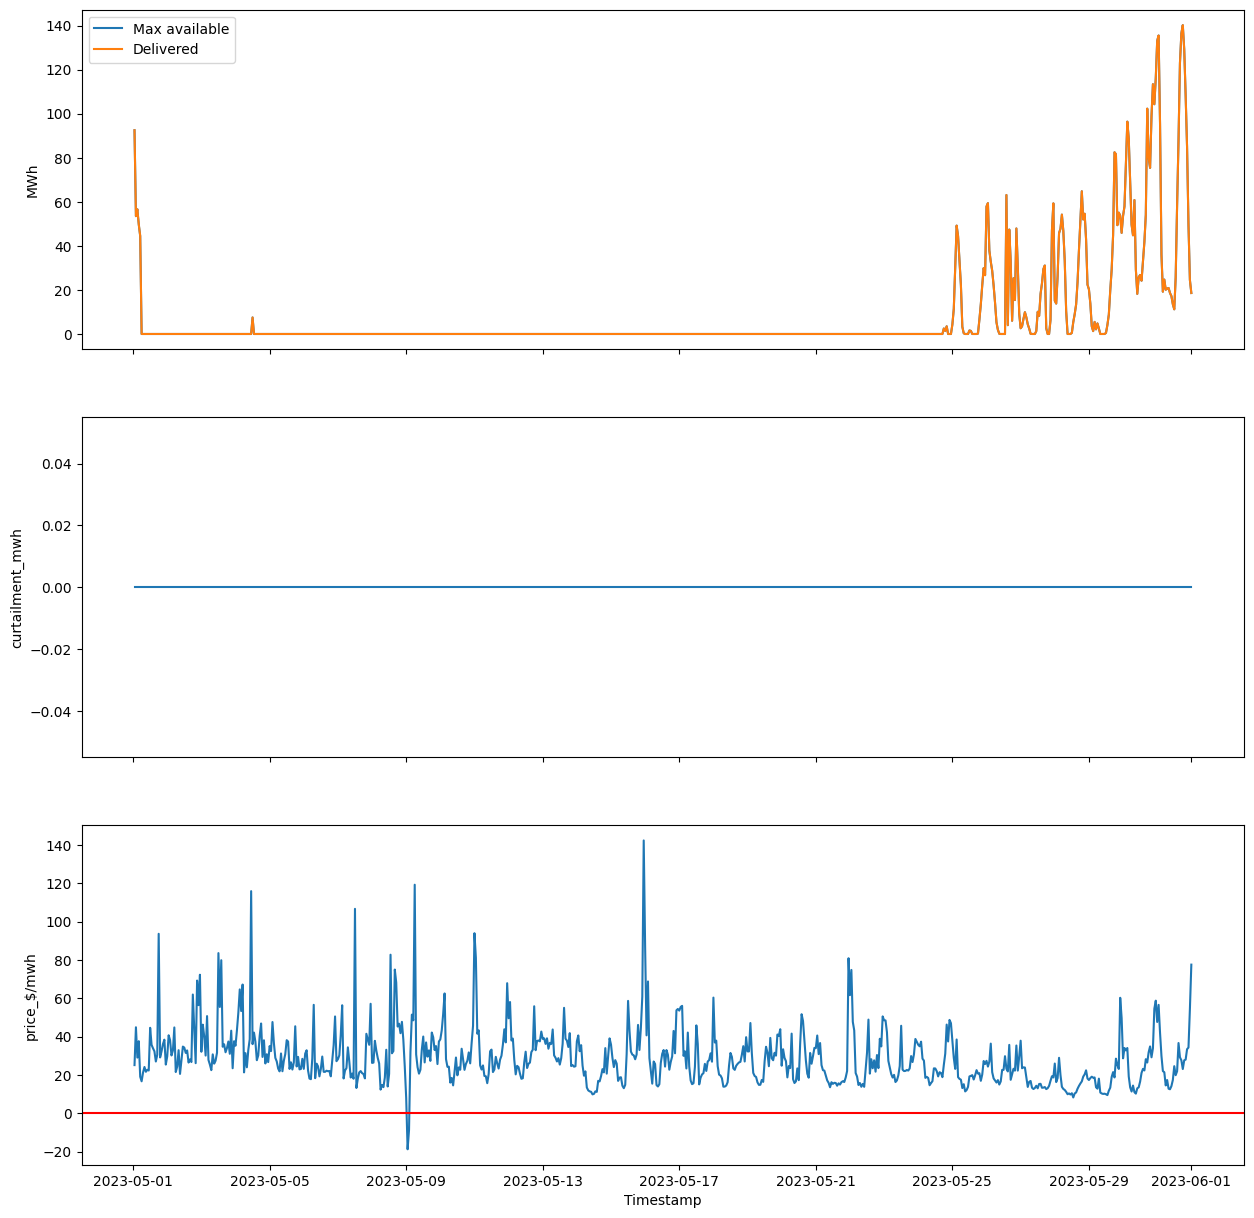

In [47]:
fig, axs = plt.subplots(3, 1, figsize=(15,15), sharex=True)

month = 5

sns.lineplot(valentino[valentino['Month'] == month], x='Timestamp', y='max_energy_mwh', ax=axs[0], label='Max available')
sns.lineplot(valentino[valentino['Month'] == month], x='Timestamp', y='delivered_energy_mwh', ax=axs[0], label='Delivered')
axs[0].set_ylabel('MWh')
axs[0].legend()

sns.lineplot(valentino[valentino['Month'] == month], x='Timestamp', y='curtailment_mwh', ax=axs[1])

sns.lineplot(valentino[valentino['Month'] == month], x='Timestamp', y='price_$/mwh', ax=axs[2])
axs[2].axhline(0, c='red')
